In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings
np.random.seed(34)
warnings.filterwarnings('ignore')

In [2]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [3]:
dftrain = pd.read_csv('CMaps/train_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv('CMaps/test_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv('CMaps/RUL_FD001.txt',sep='\s+',header=None,index_col=False,names=['RUL'])

(13096, 26)

In [4]:
train = dftrain.copy()
valid = dfvalid.copy()

In [5]:
train

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [6]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the validation dataset : ',valid.shape)
print('Percentage of the validation dataset : ',len(valid)/(len(valid)+len(train)))

Shape of the train dataset :  (20631, 26)
Shape of the validation dataset :  (13096, 26)
Percentage of the validation dataset :  0.3882942449669404


In [7]:
print('Total None values in the train dataset : ',train.isna().sum())

Total None values in the train dataset :  unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64


In [8]:
train.loc[:,['unit_number','time_cycles']].describe()

,unit_number,time_cycles
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [9]:
train.loc[:,'s_1':].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


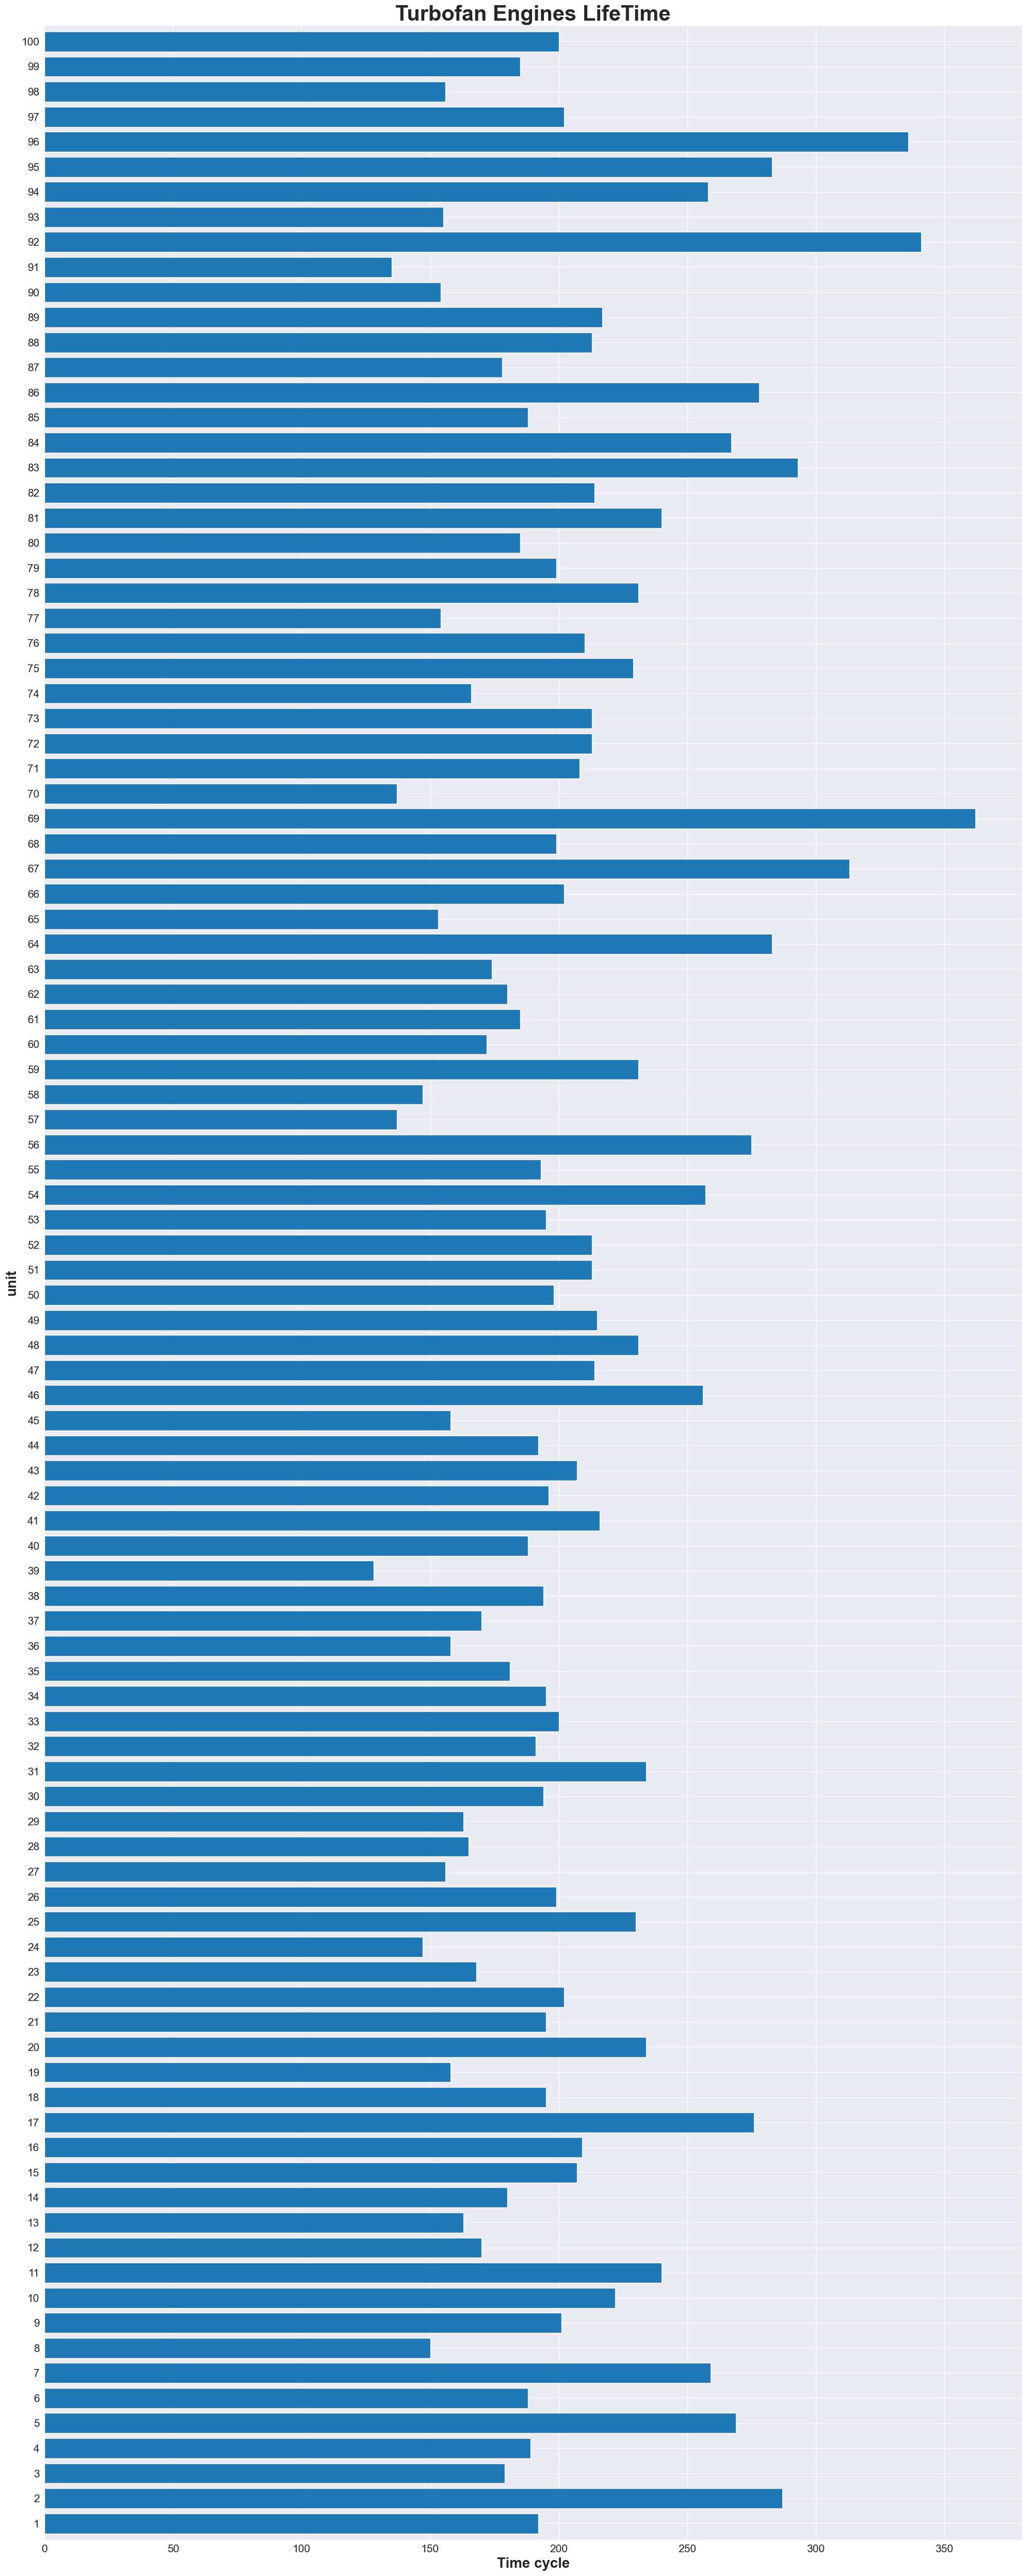

In [10]:
max_time_cycles=train[index_names].groupby('unit_number').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 9.444444444444459, 'max time cycle')

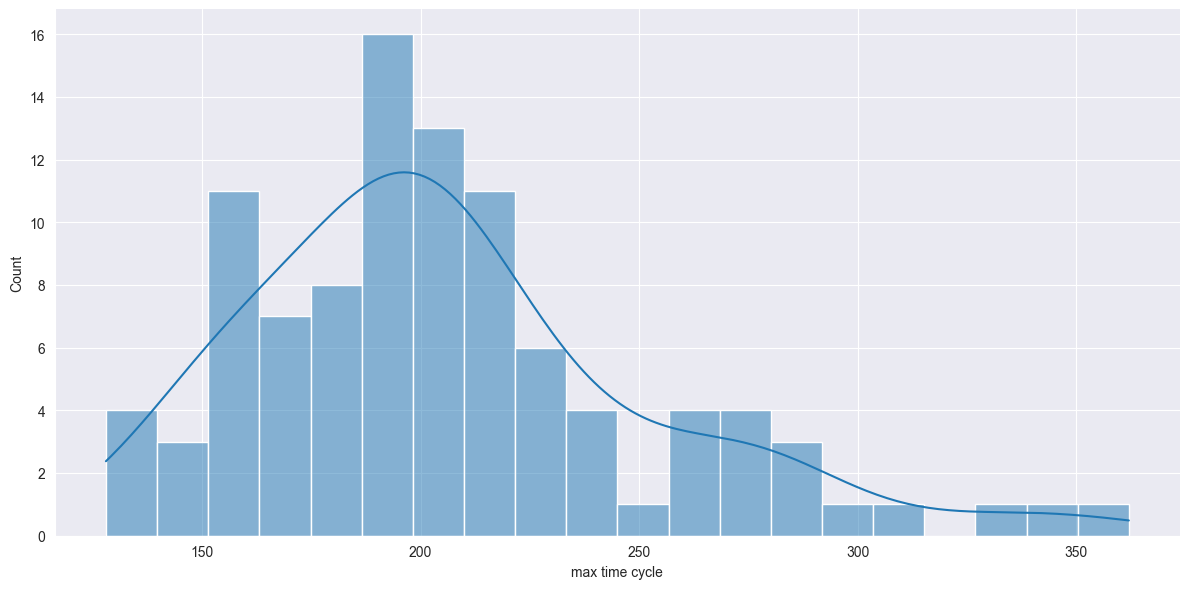

In [11]:
#Distribution of maximum time cycles
sns.displot(max_time_cycles['time_cycles'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')

In [12]:
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number')
    max_time_cycles = train_grouped_by_unit['time_cycles'].max()
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1)
    return merged

In [13]:
train = add_RUL_column(train)

In [14]:
train[['unit_number','RUL']]

,unit_number,RUL
0,1,191
1,1,190
2,1,189
3,1,188
4,1,187
...,...,...
20626,100,4
20627,100,3
20628,100,2
20629,100,1


<Axes: >

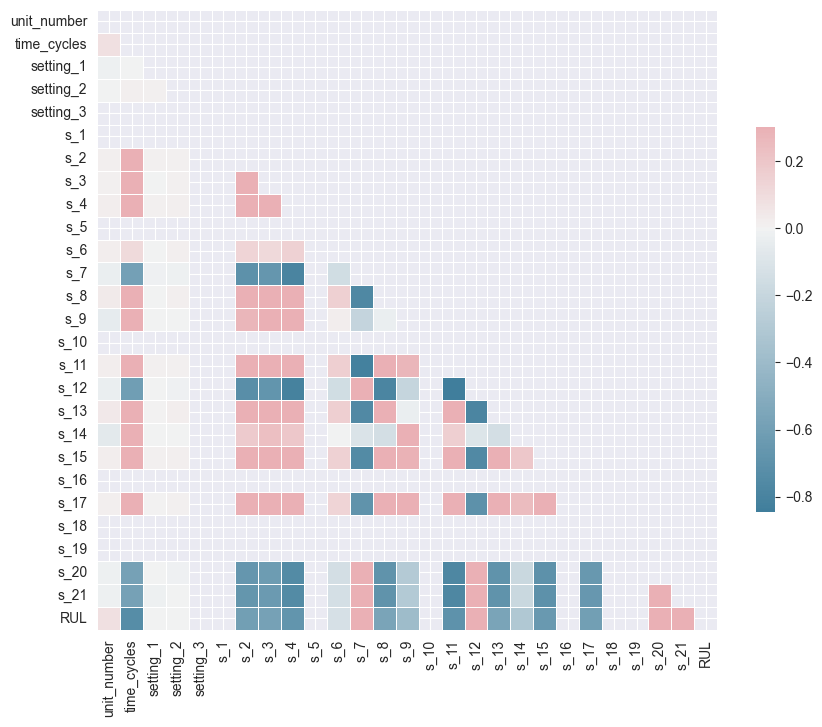

In [15]:
# Compute the correlation matrix
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
i=1
for x in dict_list :
    Sensor_dictionary['s_'+str(i)]=x
    i+=1
Sensor_dictionary

{'s_1': '(Fan inlet temperature) (◦R)',
 's_2': '(LPC outlet temperature) (◦R)',
 's_3': '(HPC outlet temperature) (◦R)',
 's_4': '(LPT outlet temperature) (◦R)',
 's_5': '(Fan inlet Pressure) (psia)',
 's_6': '(bypass-duct pressure) (psia)',
 's_7': '(HPC outlet pressure) (psia)',
 's_8': '(Physical fan speed) (rpm)',
 's_9': '(Physical core speed) (rpm)',
 's_10': '(Engine pressure ratio(P50/P2)',
 's_11': '(HPC outlet Static pressure) (psia)',
 's_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 's_13': '(Corrected fan speed) (rpm)',
 's_14': '(Corrected core speed) (rpm)',
 's_15': '(Bypass Ratio) ',
 's_16': '(Burner fuel-air ratio)',
 's_17': '(Bleed Enthalpy)',
 's_18': '(Required fan speed)',
 's_19': '(Required fan conversion speed)',
 's_20': '(High-pressure turbines Cool air flow)',
 's_21': '(Low-pressure turbines Cool air flow)'}

In [19]:
train.loc[:,'s_1':].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


In [21]:
from sklearn.model_selection import train_test_split
drop_labels = index_names+setting_names
X_train=train.drop(columns=drop_labels).copy()
X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'], test_size=0.3, random_state=42)

In [22]:
scaler = StandardScaler()
#Droping the target variable
X_train.drop(columns=['RUL'], inplace=True)
X_test.drop(columns=['RUL'], inplace=True)
#Scaling X_train and X_test
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)
#Conserve only the last occurence of each unit to match the length of y_valid
X_valid = valid.groupby('unit_number').last().reset_index().drop(columns=drop_labels)
#scaling X_valid
X_valid_s=scaler.transform(X_valid)

In [23]:
print(X_valid_s.shape)
print(y_valid.shape)

(100, 21)
(100, 1)


array([[<Axes: title={'center': 's_2'}>, <Axes: title={'center': 's_3'}>,
        <Axes: title={'center': 's_4'}>, <Axes: title={'center': 's_7'}>],
       [<Axes: title={'center': 's_8'}>, <Axes: title={'center': 's_9'}>,
        <Axes: title={'center': 's_11'}>,
        <Axes: title={'center': 's_12'}>],
       [<Axes: title={'center': 's_13'}>,
        <Axes: title={'center': 's_14'}>,
        <Axes: title={'center': 's_15'}>,
        <Axes: title={'center': 's_17'}>],
       [<Axes: title={'center': 's_20'}>,
        <Axes: title={'center': 's_21'}>, <Axes: >, <Axes: >]],
      dtype=object)

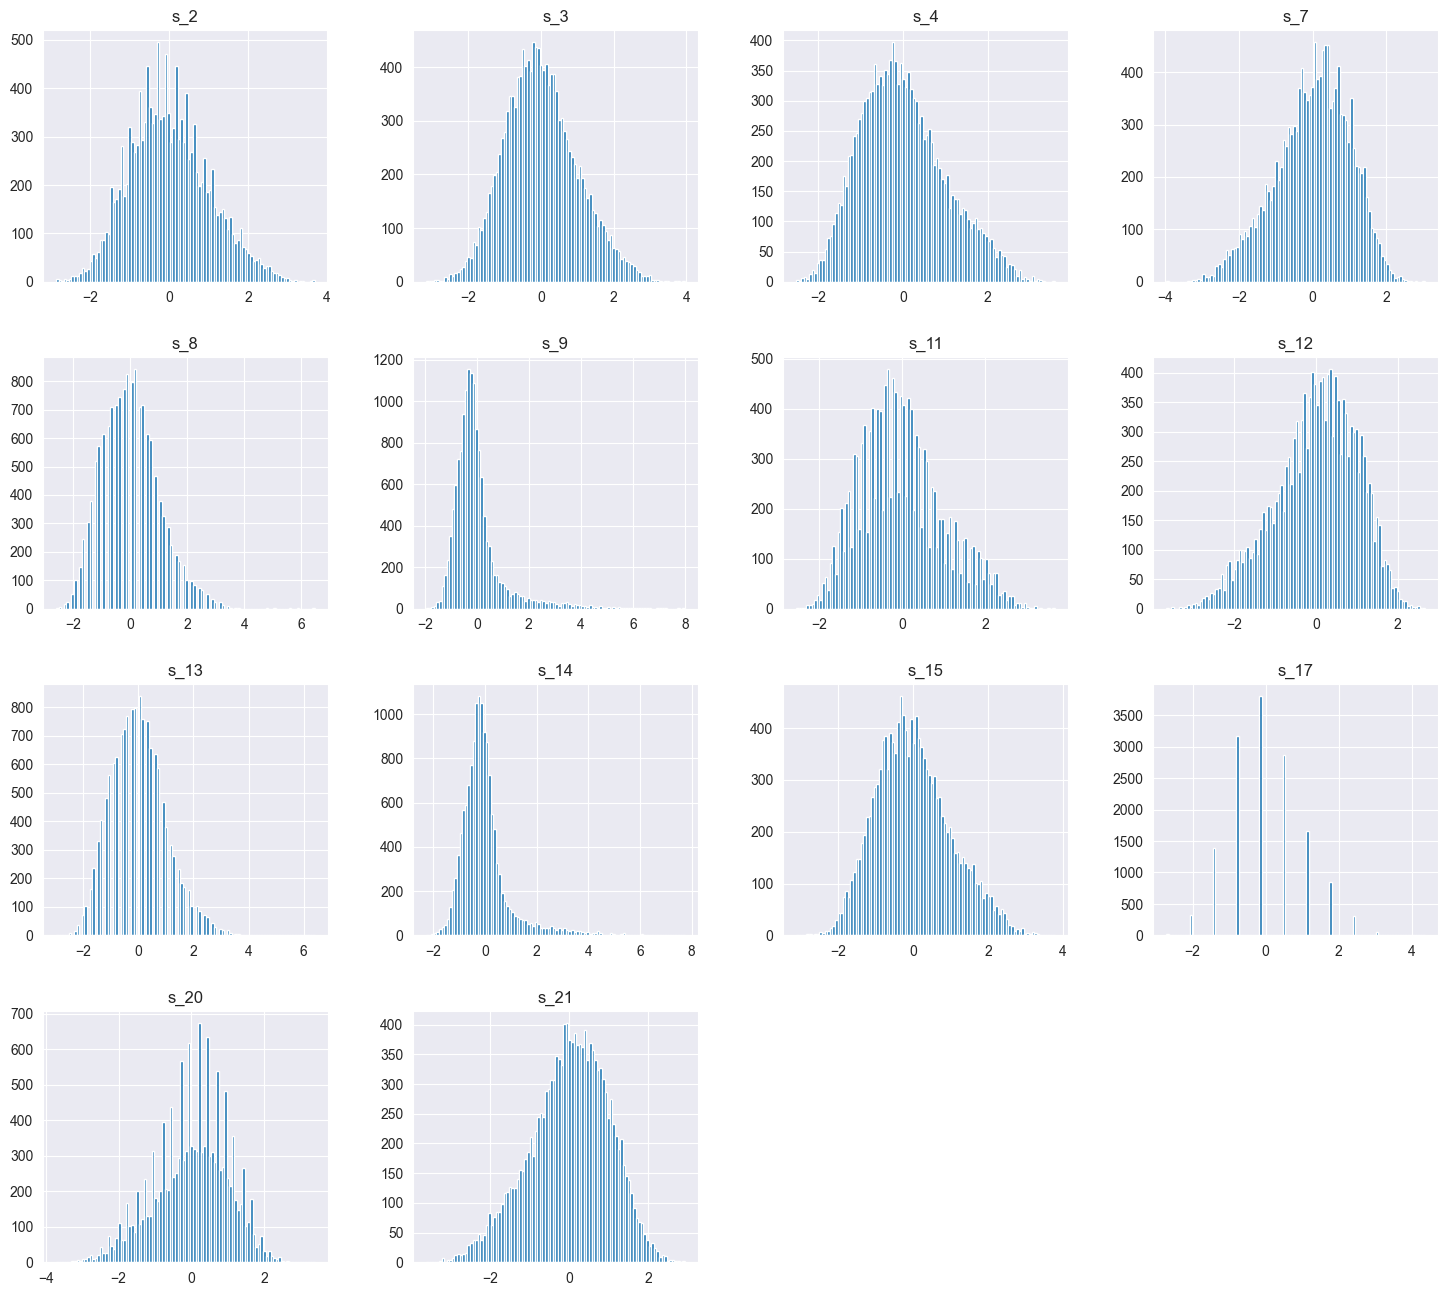

In [24]:
sensor_names=['s_{}'.format(i) for i in range(1,22) if i not in [1,5,6,10,16,18,19]]
pd.DataFrame(X_train_s,columns=['s_{}'.format(i) for i in range(1,22)])[sensor_names].hist(bins=100, figsize=(18,16))

Support Vector Regression

In [25]:
from sklearn.svm import SVR
regressor=SVR(kernel="rbf")

In [26]:
rf=RandomForestRegressor(max_features="sqrt",random_state=42)

In [27]:
#R2 score & RMSE & MAER
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [28]:
#plot real data and the predicted one to make some comparison
def plot_predActual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)

    plt.show()

In [33]:
class Linear_Regression() :
    def __init__( self, lr=0.01, iterations=150 ) :
        self.lr = lr
        self.iterations = iterations
    def fit( self, X, Y ) :
        self.l, self.p = X.shape
        # weight initializer
        self.W = np.zeros( self.p )
        self.b = 0
        self.X = X
        self.Y = Y
        # gradientlearning
        for i in range( self.iterations ) :
            self.weight_updater()
        return self

    def weight_updater( self ) :
        Y_pred = self.predict( self.X )
        #  gradients
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.l
        db = - 2 * np.sum( self.Y - Y_pred ) / self.l
        # new weights assigned
        self.b = self.b - self.lr * db
        self.W = self.W - self.lr * dW
        return self

    def predict( self, X ) :
          # Y_pr=X.W+b
        return X.dot( self.W ) + self.b

Linear Regression

In [34]:
lr=Linear_Regression() #Instantiation
lr.fit(X=X_train_s, Y=y_train) #Fitting

y_lr_train = lr.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_s)  #Prediction on test data
evaluate(y_test, y_lr_test, label='test')

y_lr_valid= lr.predict(X_valid_s) #Prediction on validation data
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:45.14557898355911, R2:0.576626043733063
test set RMSE:44.61663708101261, R2:0.5653970681116045
valid set RMSE:28.37301698890489, R2:0.5338223030547959


SVR

In [31]:
regressor.fit(X_train_s, y_train) # fitting

y_svr_train = regressor.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_s) #Prediction on test data
evaluate(y_test, y_svr_test, label='test')

y_svr_valid= regressor.predict(X_valid_s)  #Prediction on validation data
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:42.51368842230568, R2:0.6245507376796373
test set RMSE:42.26908145251176, R2:0.6099281529678411
valid set RMSE:26.511786819495892, R2:0.5929774660678513


Random Forest Regressor

In [35]:
# gridsearch goes here
rf.fit(X_train_s, y_train)
# predict and evaluate
y_rf_train = rf.predict(X_train_s)
evaluate(y_train,y_rf_train, label='train')

y_rf_test = rf.predict(X_test_s)
evaluate(y_test, y_rf_test, label='test')

y_rf_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_rf_valid, label='valid')

train set RMSE:15.407860515792654, R2:0.9506850767954228
test set RMSE:41.283225500267996, R2:0.627911515303848
valid set RMSE:33.12090111998766, R2:0.3647498971549443


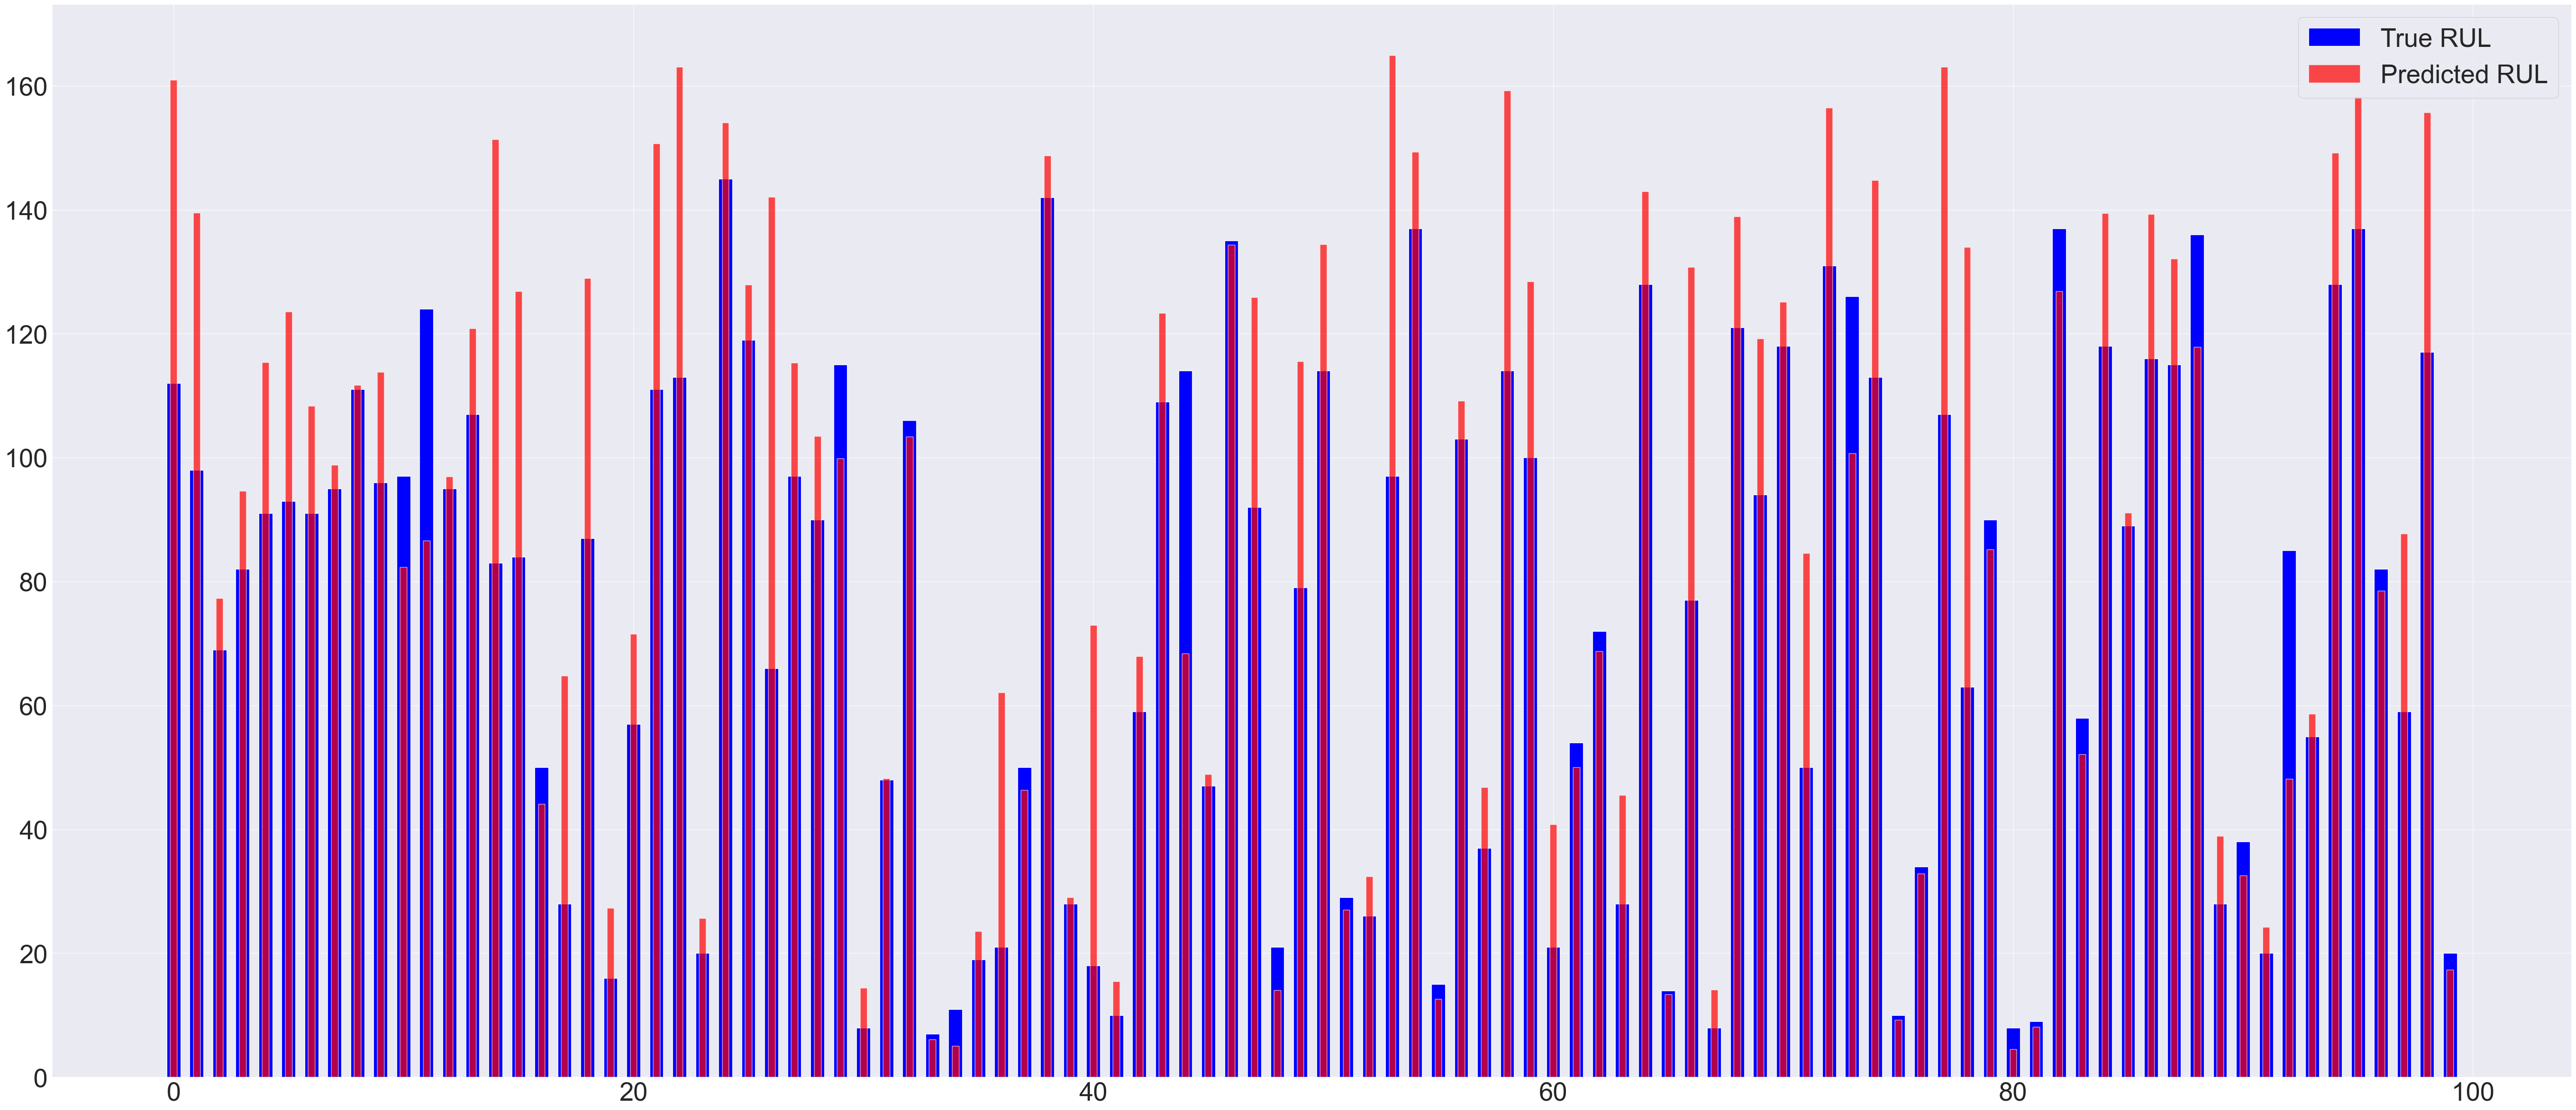

In [36]:
plot_predActual(y_valid, y_svr_valid)

Drop useless sensors

In [38]:
drop_labels2=['s_1', 's_5','s_6','s_10',  's_16', 's_18', 's_19'] #Fan inlet temp, fan inlet pressure, bypass-duct pressure, engine pressure ratio
X_train_2=X_train.drop(columns=drop_labels2, axis=1) # drop the constant columns from the train dataset
X_test_2=X_test.drop(columns=drop_labels2, axis=1)  # drop the constant columns from the test dataset
X_train_2_s=scaler.fit_transform(X_train_2) #scaling X_train_2
X_test_2_s=scaler.transform(X_test_2) #scaling X_test_2
y_train_clip=y_train.clip(upper=195)  #Clipping y_train to have 195 as the maximum value
X_valid_2=X_valid.drop(columns=drop_labels2, axis=1)  # drop the constant columns from the validation dataset
X_valid_2_s=scaler.transform(X_valid_2) #scaling X_valid_2

Linear Regression

In [39]:
lr=Linear_Regression()
lr.fit(X=X_train_2_s, Y=y_train_clip)

y_lr_train = lr.predict(X_train_2_s)
evaluate(y_train_clip,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_2_s)
evaluate(y_test, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_2_s)
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:36.31996872644402, R2:0.6425674415102505
test set RMSE:45.40139620254046, R2:0.5499742094460167
valid set RMSE:25.47493456247628, R2:0.6241914902188046


SVR

In [40]:
regressor.fit(X_train_2_s, y_train)

y_svr_train = regressor.predict(X_train_2_s)
evaluate(y_train_clip,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_2_s)
evaluate(y_test, y_svr_test, label='test')

y_svr_valid = regressor.predict(X_valid_2_s)
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:32.615895407456385, R2:0.7117549954141985
test set RMSE:42.06508599643716, R2:0.6136841309856486
valid set RMSE:26.493147211835634, R2:0.593549594487045


Random Forest

In [41]:
rf.fit(X_train_2_s, y_train_clip)
# predict and evaluate
y_rf_train = rf.predict(X_train_2_s)
evaluate(y_train_clip,y_rf_train, label='train')

y_rf_test = rf.predict(X_test_2_s)
evaluate(y_test, y_rf_test, label='test')

y_rf_valid = rf.predict(X_valid_2_s)
evaluate(y_valid, y_rf_valid, label='valid')

train set RMSE:12.03715611853247, R2:0.9607399395020003
test set RMSE:41.728559347503165, R2:0.6198405692865071
valid set RMSE:28.298659155514777, R2:0.5362625469809646


In [42]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=110, learning_rate=0.02, gamma=0, subsample=0.8,colsample_bytree=0.5, max_depth=3)
xgb.fit(X_train_2_s, y_train_clip)


y_xgb_train = xgb.predict(X_train_2_s)
evaluate(y_train_clip,y_xgb_train, label='train')

y_xgb_test = xgb.predict(X_test_2_s)
evaluate(y_test, y_xgb_test, label='test')

y_xgb_valid = xgb.predict(X_valid_2_s)
evaluate(y_valid, y_xgb_valid, label='valid')

train set RMSE:35.74111559551126, R2:0.653869885342057
test set RMSE:46.43163584208228, R2:0.5293186878846678
valid set RMSE:20.429405943944328, R2:0.7583137561617461


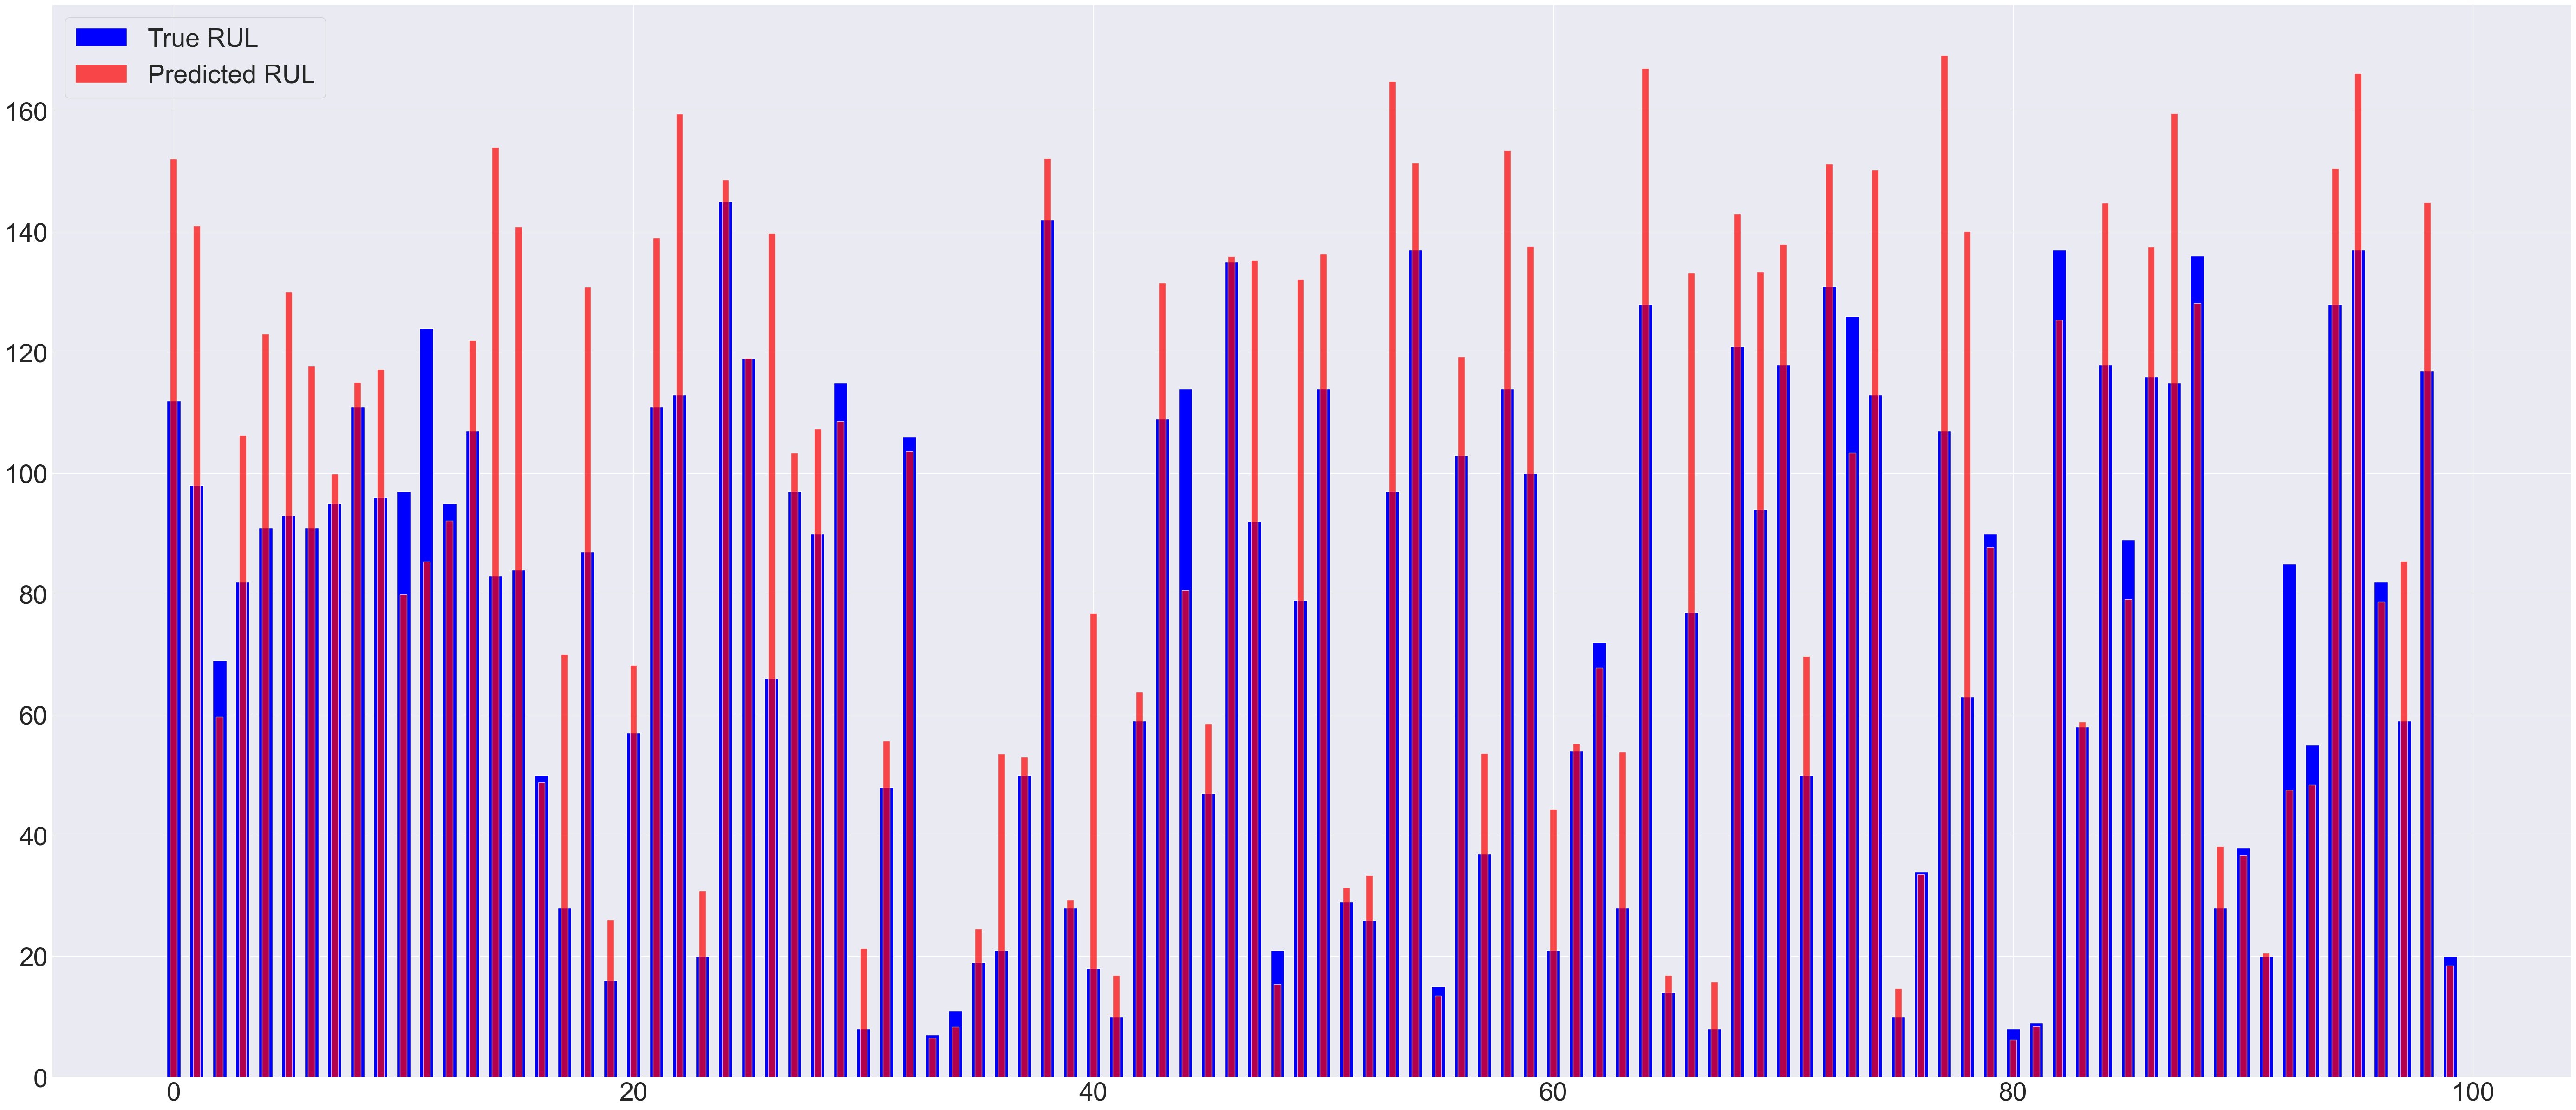

In [43]:
plot_predActual(y_valid, y_rf_valid)

In [62]:
df=train.copy()
for x in X_train_2.columns:
    df[x+'_rm']=0
df.columns

Index(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3',
       's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19',
       's_20', 's_21', 'RUL', 's_2_rm', 's_3_rm', 's_4_rm', 's_7_rm', 's_8_rm',
       's_9_rm', 's_11_rm', 's_12_rm', 's_13_rm', 's_14_rm', 's_15_rm',
       's_17_rm', 's_20_rm', 's_21_rm'],
      dtype='object')

In [66]:
drop_labels2=['s_1', 's_5','s_6','s_10',  's_16', 's_18', 's_19']
df=df.drop(columns=setting_names+drop_labels2+['RUL'], axis=1)

X_valid_3=valid.drop(columns=index_names+setting_names+drop_labels2, axis=1)

KeyError: "['setting_1', 'setting_2', 'setting_3', 's_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19', 'RUL'] not found in axis"

In [67]:
def update_rolling_mean(data, mask):
    for x, group in mask.groupby("unit_number"):
        for x in X_train_2.columns:
            data.loc[group.index[10:], x+"_rm"] = data.loc[group.index, x].rolling(10).mean()[10:]
            data.loc[group.index[:10], x+"_rm"] = data.loc[group.index[:10], x]

update_rolling_mean(df, df)
update_rolling_mean(X_valid_3, valid)

X_valid_3=X_valid_3.fillna(0)

In [68]:
df.iloc[-1,-14:]=df.iloc[-2,-14:]
X_valid_3.iloc[-1,-14:]=X_valid_3.iloc[-2,-14:]

In [69]:
drop_labels2=['s_2','s_3','s_4', 's_7','s_8','s_9',  's_11', 's_12','s_13', 's_14','s_15','s_17','s_20','s_21']
df=df.drop(columns=drop_labels2, axis=1)
df

,unit_number,time_cycles,s_2_rm,s_3_rm,s_4_rm,s_7_rm,s_8_rm,s_9_rm,s_11_rm,s_12_rm,s_13_rm,s_14_rm,s_15_rm,s_17_rm,s_20_rm,s_21_rm
0,1,1,641.820,1589.700,1400.600,554.360,2388.060,9046.190,47.470,521.660,2388.020,8138.620,8.41950,392.0,39.060,23.41900
1,1,2,642.150,1591.820,1403.140,553.750,2388.040,9044.070,47.490,522.280,2388.070,8131.490,8.43180,392.0,39.000,23.42360
2,1,3,642.350,1587.990,1404.200,554.260,2388.080,9052.940,47.270,522.420,2388.030,8133.230,8.41780,390.0,38.950,23.34420
3,1,4,642.350,1582.790,1401.870,554.450,2388.110,9049.480,47.130,522.860,2388.080,8133.830,8.36820,392.0,38.880,23.37390
4,1,5,642.370,1582.850,1406.220,554.000,2388.060,9055.150,47.280,522.190,2388.040,8133.800,8.42940,393.0,38.900,23.40440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.456,1599.625,1426.079,551.477,2388.224,9066.903,48.116,519.840,2388.237,8141.170,8.51031,396.0,38.453,23.09254
20627,100,197,643.447,1600.379,1427.288,551.410,2388.225,9066.820,48.116,519.793,2388.237,8140.771,8.51083,395.9,38.416,23.08540
20628,100,198,643.470,1600.848,1427.449,551.427,2388.223,9066.642,48.096,519.796,2388.240,8140.882,8.51915,396.2,38.424,23.07321
20629,100,199,643.424,1601.389,1427.787,551.334,2388.230,9067.045,48.136,519.813,2388.239,8140.833,8.52434,396.0,38.388,23.07370


In [72]:
train_tm=df
train_tm=train_tm.drop(columns=index_names, axis=1)

In [73]:
X_valid_3=X_valid_3.drop(columns=drop_labels2,axis=1)
X_valid_3

,s_2_rm,s_3_rm,s_4_rm,s_7_rm,s_8_rm,s_9_rm,s_11_rm,s_12_rm,s_13_rm,s_14_rm,s_15_rm,s_17_rm,s_20_rm,s_21_rm
0,643.020,1585.290,1398.210,553.900,2388.040,9050.170,47.200,521.720,2388.030,8125.550,8.40520,392.0,38.860,23.37350
1,641.710,1588.450,1395.420,554.850,2388.010,9054.420,47.500,522.160,2388.060,8139.620,8.38030,393.0,39.020,23.39160
2,642.460,1586.940,1401.340,554.110,2388.050,9056.960,47.500,521.970,2388.030,8130.100,8.44410,393.0,39.080,23.41660
3,642.440,1584.120,1406.420,554.070,2388.030,9045.290,47.280,521.380,2388.050,8132.900,8.39170,391.0,39.000,23.37370
4,642.510,1587.190,1401.920,554.160,2388.010,9044.550,47.310,522.150,2388.030,8129.540,8.40310,390.0,38.990,23.41300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,643.052,1594.336,1415.826,553.252,2388.045,9134.569,47.631,521.320,2388.048,8205.895,8.45695,394.3,38.750,23.28929
13092,643.090,1594.687,1416.671,553.287,2388.049,9136.256,47.611,521.275,2388.057,8207.451,8.45783,394.4,38.726,23.28693
13093,643.096,1594.798,1415.728,553.229,2388.054,9137.904,47.602,521.236,2388.059,8208.872,8.45550,394.6,38.699,23.27511
13094,643.182,1594.778,1415.969,553.276,2388.059,9140.145,47.579,521.216,2388.062,8211.164,8.45629,394.7,38.678,23.27117


In [76]:
X_train_tm, X_test_tm, y_train_tm, y_test_tm=train_test_split(train_tm,train['RUL'].clip(upper=195), test_size=0.35, random_state=42)
X_train_tm_s=scaler.fit_transform(X_train_tm)
X_test_tm_s=scaler.transform(X_test_tm)
X_val3=pd.concat([valid['unit_number'],X_valid_3],axis=1)
X_valid3 = X_val3.groupby('unit_number').last().reset_index().drop(columns=['unit_number'])
X_valid_s=scaler.transform(X_valid3)
y_train_tm

12276     30
8157      80
11666    103
12639    124
5278      30
        ... 
11284    107
11964    162
5390      74
860      195
15795    157
Name: RUL, Length: 13410, dtype: int64

In [81]:
X_train_tm

,s_2_rm,s_3_rm,s_4_rm,s_7_rm,s_8_rm,s_9_rm,s_11_rm,s_12_rm,s_13_rm,s_14_rm,s_15_rm,s_17_rm,s_20_rm,s_21_rm
12276,643.076,1597.030,1418.850,552.248,2388.210,9052.073,47.876,520.528,2388.217,8128.418,8.49376,394.6,38.637,23.18151
8157,642.625,1589.028,1406.019,553.810,2388.086,9062.738,47.519,521.596,2388.093,8141.569,8.44747,393.1,38.835,23.31298
11666,642.152,1582.890,1401.447,554.043,2388.042,9055.199,47.264,522.098,2388.034,8138.277,8.42317,391.7,38.972,23.38346
12639,642.584,1591.818,1407.872,553.259,2388.089,9064.135,47.539,521.348,2388.090,8141.829,8.44659,393.6,38.847,23.27593
5278,642.995,1596.907,1419.538,552.621,2388.124,9090.165,47.793,520.804,2388.133,8165.247,8.48251,394.5,38.712,23.16616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,642.404,1586.032,1401.259,554.016,2388.063,9048.290,47.317,521.869,2388.059,8132.513,8.41855,392.3,38.942,23.35120
11964,642.129,1583.225,1396.981,554.806,2388.003,9061.704,47.116,522.522,2387.988,8144.454,8.38236,390.3,39.088,23.41921
5390,642.602,1590.831,1409.856,553.675,2388.071,9068.448,47.477,521.684,2388.109,8147.567,8.43209,393.1,38.840,23.31430
860,642.119,1583.074,1394.760,554.555,2387.991,9066.250,47.187,522.522,2387.998,8148.471,8.40583,391.6,39.068,23.40361


In [80]:
X_test_tm

,s_2_rm,s_3_rm,s_4_rm,s_7_rm,s_8_rm,s_9_rm,s_11_rm,s_12_rm,s_13_rm,s_14_rm,s_15_rm,s_17_rm,s_20_rm,s_21_rm
13857,642.675,1590.568,1405.013,553.243,2388.109,9059.328,47.527,521.362,2388.104,8138.791,8.42836,392.6,38.882,23.31439
1710,643.423,1601.442,1424.101,551.473,2388.271,9046.206,48.124,519.875,2388.264,8121.435,8.50499,395.3,38.481,23.08642
9278,642.389,1584.193,1398.082,554.324,2387.996,9065.151,47.196,522.082,2388.008,8145.139,8.40531,391.6,38.967,23.41897
10786,643.599,1603.564,1426.100,551.728,2388.154,9145.715,48.049,520.082,2388.159,8211.963,8.51241,396.5,38.453,23.07913
19709,642.443,1589.868,1405.054,553.827,2388.077,9054.641,47.385,521.818,2388.091,8136.633,8.41357,392.5,38.915,23.33228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15797,642.181,1584.050,1397.460,554.482,2388.012,9056.021,47.176,522.380,2388.003,8140.491,8.39186,391.5,39.074,23.43581
8115,642.494,1589.443,1404.223,554.007,2388.050,9062.172,47.393,521.835,2388.054,8141.846,8.42114,392.5,38.929,23.36097
12553,642.462,1588.139,1405.457,553.559,2388.072,9058.245,47.425,521.737,2388.074,8137.026,8.42915,392.5,38.885,23.32947
18742,642.674,1589.334,1409.850,553.309,2388.084,9070.358,47.550,521.252,2388.089,8146.872,8.43642,393.5,38.790,23.31044


Linear Regression

In [82]:
lr=Linear_Regression()
lr.fit(X_train_tm_s, y_train_tm)

y_lr_train = lr.predict(X_train_tm_s)
evaluate(y_train_tm,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_tm_s)
evaluate(y_test_tm, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_s)
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:36.40715080018154, R2:0.6405088120845936
test set RMSE:36.41618967502389, R2:0.6325998622956897
valid set RMSE:27.451866357626173, R2:0.5636005367649255


SVR

In [83]:
regressor.fit(X_train_tm_s, y_train_tm)

y_svr_train = regressor.predict(X_train_tm_s)
evaluate(y_train_tm,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_tm_s)
evaluate(y_test_tm, y_svr_test, label='test')

y_svr_valid = regressor.predict(X_valid_s)
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:32.69552846667167, R2:0.7100710474304859
test set RMSE:32.91827760310044, R2:0.6997904409405933
valid set RMSE:29.122972233942154, R2:0.5088526014130043


Random Forest

In [85]:
rf = RandomForestRegressor(max_features="sqrt", random_state=42)
rf.fit(X_train_tm_s, y_train_tm)
# predict and evaluate
y_hat_train = rf.predict(X_train_tm_s)
evaluate(y_train_tm,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:8.346236594690824, R2:0.9811072034767434
test set RMSE:22.607102877773677, R2:0.858407538685541
valid set RMSE:28.505404715597354, R2:0.5294618088128946


Performing Grid Search

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = {
    'n_estimators': [50,90,120],
    'max_depth' : [8,9,10],
}

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=3)

grid.fit(X_train_tm_s, y_train_tm)

print(grid.best_score_ , grid.best_params_)
#max_features=5,

0.7959382718739357 {'max_depth': 10, 'n_estimators': 120}


In [87]:
rf=RandomForestRegressor(n_estimators=90,  max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train_tm_s, y_train_tm)
# predict and evaluate
y_hat_train = rf.predict(X_train_tm_s)
evaluate(y_train_tm,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:23.796576325838625, R2:0.8464167615713776
test set RMSE:27.4539485922306, R2:0.7911858416025557
valid set RMSE:28.49590795566292, R2:0.5297752822693657


In [88]:
# Params found using Bayesian Optimisation
xgb = xgboost.XGBRegressor(n_estimators=50,
                           max_depth=6,
                           learning_rate=0.1,
                           reg_lambda=0.02,
                           gamma=0.4,
                           random_state=42)
xgb.fit(X_train_tm_s, y_train_tm)

# predict and evaluate
y_hat_train = xgb.predict(X_train_tm_s)
evaluate(y_train_tm, y_hat_train, 'train')

y_hat_test = xgb.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test)

y_hat_valid = xgb.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:24.657141200513, R2:0.8351077256732291
test set RMSE:27.799133628045194, R2:0.7859018906250426
valid set RMSE:28.00305259212143, R2:0.5459003074249966


In [90]:
from sklearn.model_selection import KFold
train_tm_cv=train_tm.copy()
y=train['RUL'].clip(upper=195)
scores_train=[]
scores_test=[]
scores_validation=[]

cv = KFold(n_splits=4, shuffle=True)
for train_index, test_index in cv.split(train_tm) :
    print("Index du train : ", train_index, "\n")
    print("Index de test : ", test_index)
    X_train, X_test, y_train, y_test = train_tm.iloc[train_index,:], train_tm.iloc[test_index,:],y[train_index], y[test_index]
    regressor.fit(scaler.fit_transform(X_train), y_train)
    y_hat_train = regressor.predict(scaler.fit_transform(X_train))
    evaluate(y_train,y_hat_train, label='train')
    y_hat_test = regressor.predict(scaler.transform(X_test))
    evaluate(y_test, y_hat_test, label='test')
    y_hat_valid = regressor.predict(scaler.transform(X_valid3))
    evaluate(y_valid, y_hat_valid, label='valid')

Index du train :  [    1     2     3 ... 20626 20627 20628] 

Index de test :  [    0     5     7 ... 20625 20629 20630]
train set RMSE:32.663328904036014, R2:0.7089390216718425
test set RMSE:32.52496058648926, R2:0.7095689320848717
valid set RMSE:28.804627475464777, R2:0.5195314319041227
Index du train :  [    0     2     3 ... 20628 20629 20630] 

Index de test :  [    1     9    10 ... 20615 20617 20618]
train set RMSE:32.74837125582984, R2:0.7091753160453933
test set RMSE:32.22385260515585, R2:0.7096918396689642
valid set RMSE:28.904891827535128, R2:0.5161807402472617
Index du train :  [    0     1     2 ... 20628 20629 20630] 

Index de test :  [    3     6    14 ... 20612 20616 20627]
train set RMSE:32.57698775782787, R2:0.7090834401142285
test set RMSE:32.820208533669444, R2:0.7085034047086183
valid set RMSE:28.859957407052455, R2:0.5176838242233912
Index du train :  [    0     1     3 ... 20627 20629 20630] 

Index de test :  [    2     4     8 ... 20624 20626 20628]
train set 

Feature Importance

<BarContainer object of 14 artists>

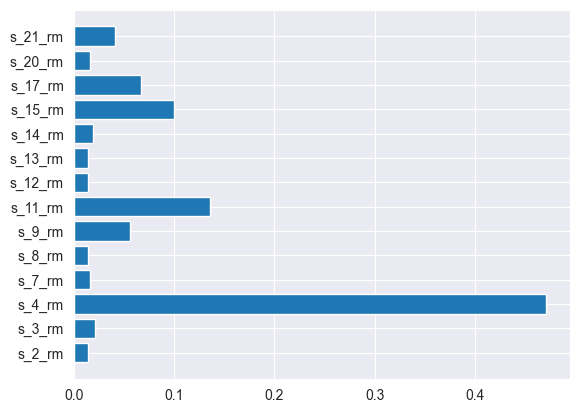

In [91]:
#BEST FEATURE FOR XGB MODEL
xgb.fit(X_train_tm_s, y_train_tm)
plt.barh(train_tm.columns, xgb.feature_importances_)

<BarContainer object of 14 artists>

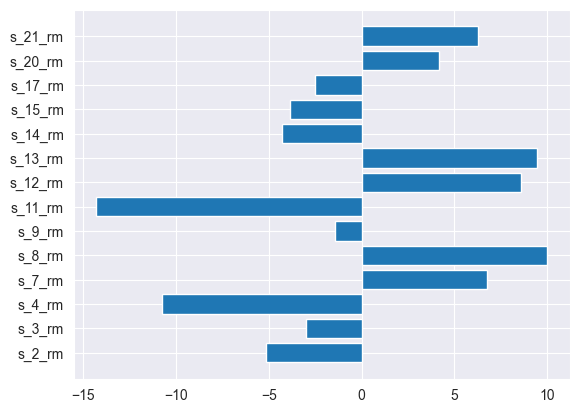

In [92]:
#BEST FEATURE FOR LINEAR REGRESSION MODEL

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=X_train_tm_s, y=y_train_tm)
plt.barh(X_train_tm.columns, model.coef_)

<BarContainer object of 14 artists>

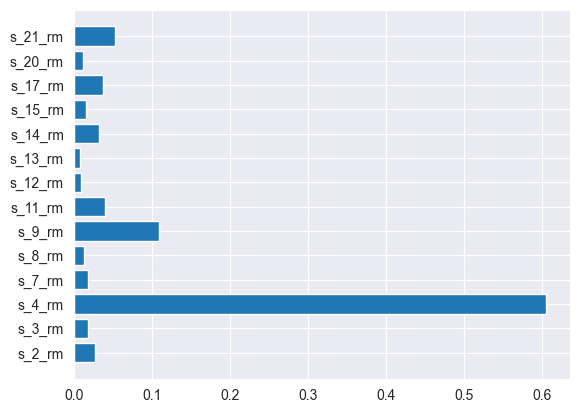

In [93]:
#BEST FEATURE FOR RF MODEL
rf.fit(X_train_tm_s, y_train_tm)
plt.barh(train_tm.columns, rf.feature_importances_)

In [94]:
dftm= pd.concat([train['unit_number'],train_tm,train['RUL']],axis=1)

In [95]:
dftm

,unit_number,s_2_rm,s_3_rm,s_4_rm,s_7_rm,s_8_rm,s_9_rm,s_11_rm,s_12_rm,s_13_rm,s_14_rm,s_15_rm,s_17_rm,s_20_rm,s_21_rm,RUL
0,1,641.820,1589.700,1400.600,554.360,2388.060,9046.190,47.470,521.660,2388.020,8138.620,8.41950,392.0,39.060,23.41900,191
1,1,642.150,1591.820,1403.140,553.750,2388.040,9044.070,47.490,522.280,2388.070,8131.490,8.43180,392.0,39.000,23.42360,190
2,1,642.350,1587.990,1404.200,554.260,2388.080,9052.940,47.270,522.420,2388.030,8133.230,8.41780,390.0,38.950,23.34420,189
3,1,642.350,1582.790,1401.870,554.450,2388.110,9049.480,47.130,522.860,2388.080,8133.830,8.36820,392.0,38.880,23.37390,188
4,1,642.370,1582.850,1406.220,554.000,2388.060,9055.150,47.280,522.190,2388.040,8133.800,8.42940,393.0,38.900,23.40440,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,643.456,1599.625,1426.079,551.477,2388.224,9066.903,48.116,519.840,2388.237,8141.170,8.51031,396.0,38.453,23.09254,4
20627,100,643.447,1600.379,1427.288,551.410,2388.225,9066.820,48.116,519.793,2388.237,8140.771,8.51083,395.9,38.416,23.08540,3
20628,100,643.470,1600.848,1427.449,551.427,2388.223,9066.642,48.096,519.796,2388.240,8140.882,8.51915,396.2,38.424,23.07321,2
20629,100,643.424,1601.389,1427.787,551.334,2388.230,9067.045,48.136,519.813,2388.239,8140.833,8.52434,396.0,38.388,23.07370,1


Classification (rul değerlerini sınıflara ayırma)

balanced data (2 classes / 3 classes / 4 classes) binning -models : random forest, svc, naive bayes, knn evaluation : confusion matrix, recall

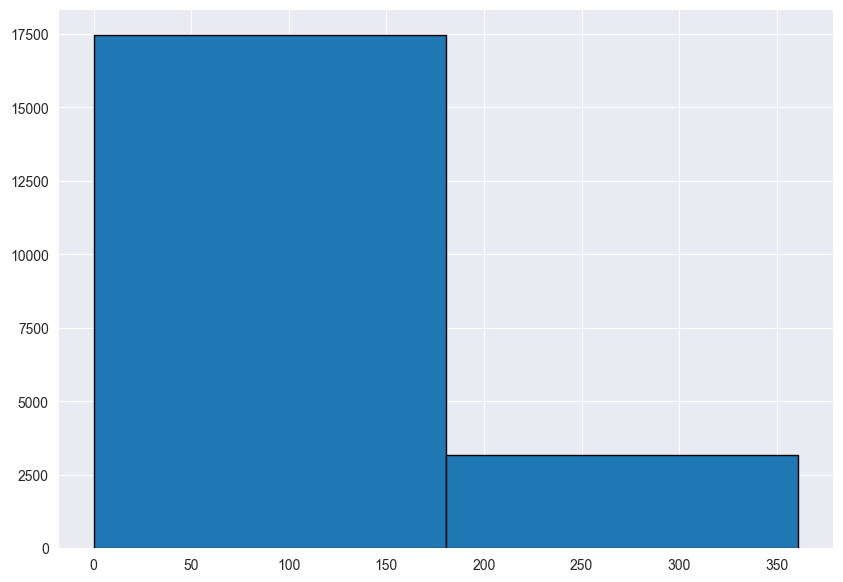

(array([17462.,  3169.]), array([  0. , 180.5, 361. ]), <BarContainer object of 2 artists>)


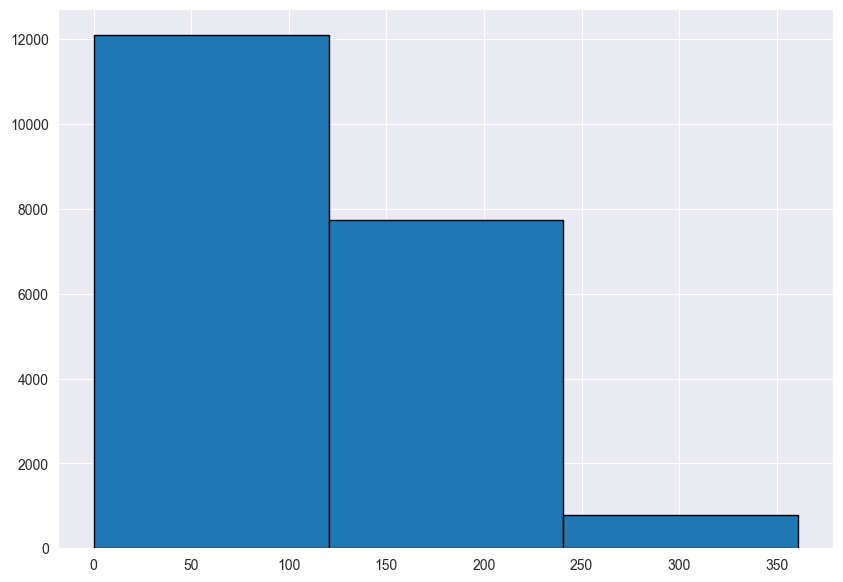

(array([12100.,  7735.,   796.]), array([  0.        , 120.33333333, 240.66666667, 361.        ]), <BarContainer object of 3 artists>)


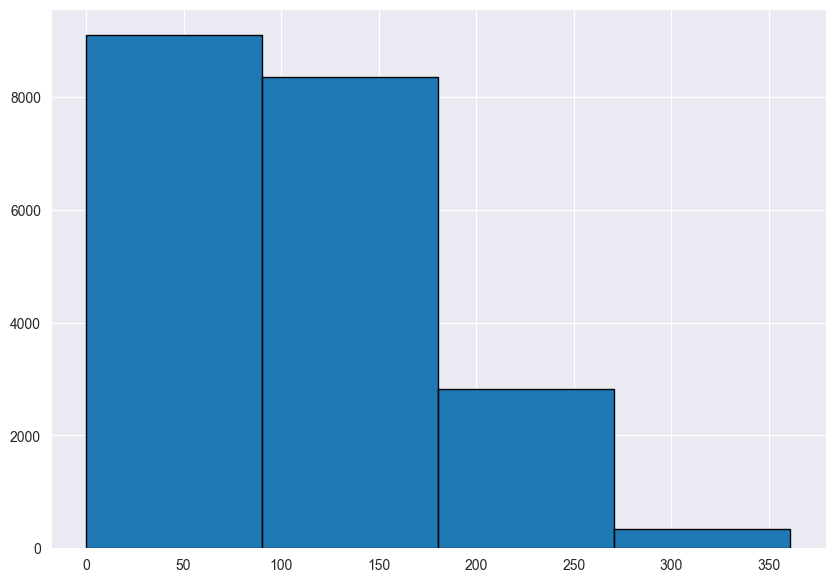

(array([9100., 8362., 2823.,  346.]), array([  0.  ,  90.25, 180.5 , 270.75, 361.  ]), <BarContainer object of 4 artists>)


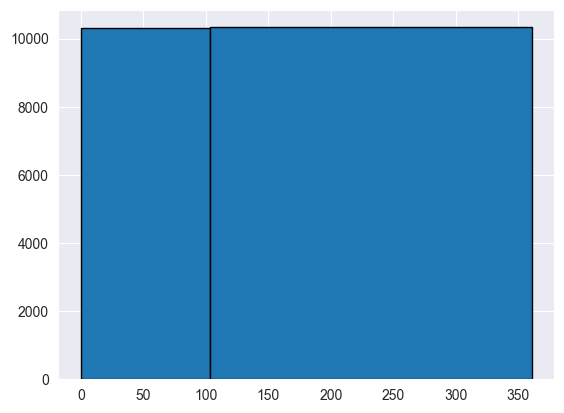

[  0. 103. 361.]


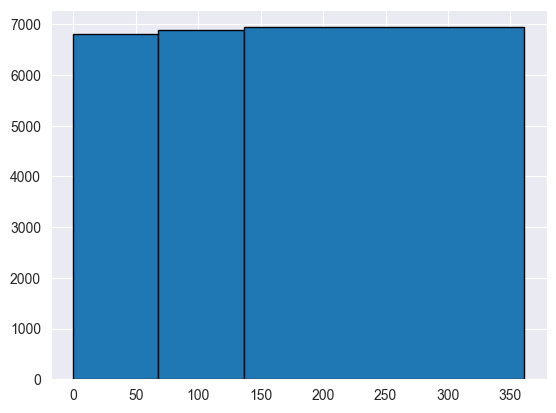

[  0.  68. 137. 361.]


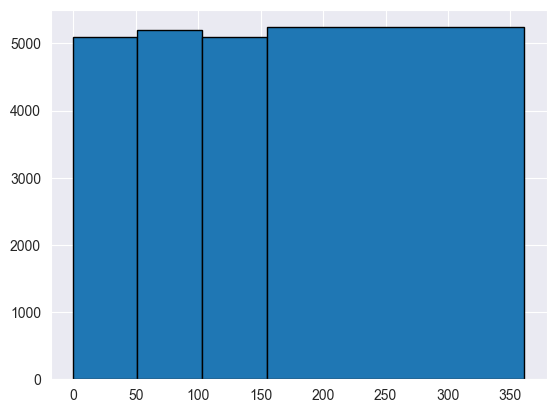

[  0.  51. 103. 155. 361.]


In [97]:
#-- fixing bins width -----
# Creating histogram of 2 bins(same width)
fig, ax = plt.subplots(figsize =(10, 7))
m=ax.hist(list(train['RUL']), bins = 2, edgecolor='black')
# Show plot
plt.show()
print(m)

# Creating histogram of 3 bins(same width)
fig, ax = plt.subplots(figsize =(10, 7))
m=ax.hist(list(train['RUL']), bins = 3, edgecolor='black')
# Show plot
plt.show()
print(m)

# Creating histogram of 4 bins(same width)
fig, ax = plt.subplots(figsize =(10, 7))
m=ax.hist(list(train['RUL']), bins = 4, edgecolor='black')
# Show plot
plt.show()
print(m)



#-- fixing bins height -----

l=len(list(train['RUL']))
k=l/4

#define function to calculate equal-frequency bins, bins=2
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins
n, bins, patches = plt.hist(list(train['RUL']), equalObs(list(train['RUL']), 2), edgecolor='black')
plt.show()
print(bins)

#define function to calculate equal-frequency bins, bins=3
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins
n, bins, patches = plt.hist(list(train['RUL']), equalObs(list(train['RUL']), 3), edgecolor='black')
plt.show()
print(bins)


#define function to calculate equal-frequency bins, bins=4
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins
n, bins, patches = plt.hist(list(train['RUL']), equalObs(list(train['RUL']), 4), edgecolor='black')
plt.show()
print(bins)

Binning outcome demonstrated that we can create classes of RUL and turn our problem to a classification problem.¶

The priority will be given for bins that give us balanced classes¶


Let's suppose we have 3 classes of RUL¶
1 for RUL in [0..68] : RISK ZONE
2 for RUL in [69..137] : MODERATED RISK

! Notice : We will be working with last version of data the containing historical data (moving average) with some dropped sensors.¶

Data preparation for classification¶

In [99]:
y_train_tm

12276     30
8157      80
11666    103
12639    124
5278      30
        ... 
11284    107
11964    162
5390      74
860      195
15795    157
Name: RUL, Length: 13410, dtype: int64

In [100]:
label_map={1:"RISK ZONE",2:"MODERATED RISK",3:"NO RISK"}

y=[]

#--Transforming rul values to classes :
for k in dftm['RUL']:
    if k<=68:
        y.append(1)
    elif k>69 and k<=137:
        y.append(2)
    else:
        y.append(3)
X_train_tm_c, X_test_tm_c, y_train_tm_c, y_test_tm_c=train_test_split(dftm.drop(columns=['unit_number','RUL']),np.array(y), test_size=0.35, stratify=np.array(y))
X_train_tm_cs=scaler.fit_transform(X_train_tm_c)
X_test_tm_cs=scaler.fit_transform(X_test_tm_c)

In [101]:
y

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [102]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true)))

In [103]:
# Fit du  Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 1)

In [104]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [105]:
y_valid_c=[]
for k in y_valid['RUL']:
    if k<=68:
        y_valid_c.append(1)
    elif k>69 and k<=137:
        y_valid_c.append(2)
    else:
        y_valid_c.append(3)

y_valid_c=np.array(y_valid_c)

SVC

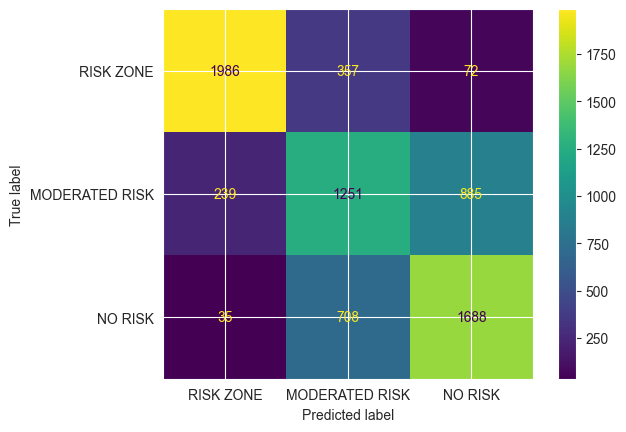

SVM
Accuracy score of training 0.687
Error rate of training 0.178
Accuracy score of test 0.682
Error rate of test 0.183
              precision    recall  f1-score   support

           1       0.88      0.82      0.85      2415
           2       0.54      0.53      0.53      2375
           3       0.64      0.69      0.67      2431

    accuracy                           0.68      7221
   macro avg       0.69      0.68      0.68      7221
weighted avg       0.69      0.68      0.68      7221



In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

classifier.fit(X_train_tm_cs,np.array(y_train_tm_c))
y_svc_train=classifier.predict(X_train_tm_cs)

y_svc_test=classifier.predict(X_test_tm_cs)


cm= confusion_matrix(y_test_tm_c, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('SVM')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train_tm_c, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_svc_test))
print(metrics.classification_report(y_test_tm_c,y_svc_test))

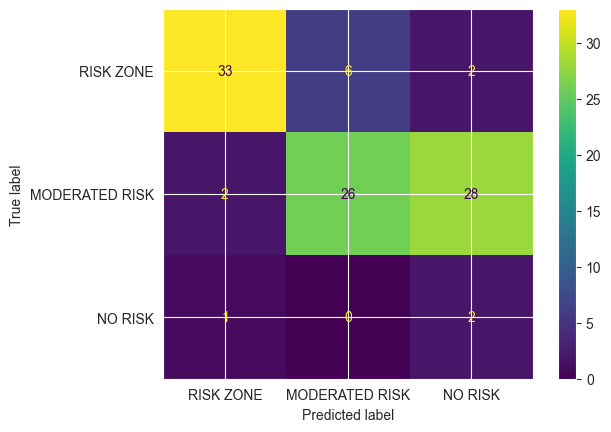

SVM
Accuracy score of validation 0.610
Error rate of validation 0.257


In [107]:
y_svc_valid=classifier.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_svc_valid, labels=classifier.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
disp.plot()
plt.show()
print('SVM')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c,  y_svc_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c, y_svc_valid))